In [22]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv'
data=pd.read_csv(url)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


we have load the data from that particular link and now we have to predict the sales regarding all the aspects of chanels 

In [24]:
data.shape

(200, 5)

there are 200 rows and 5 columns in the dataset 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


it will give you information like is there any value in ay column of dataset or the type of data that each column contained in dataset 
1. TV=float datatype
2. radio=float datatype
3. newspaper=float datatype
4. sales= float datatype

float datatype means values that contain decimal points or decimal values

In [26]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


describe function gives us the summary of each column  
1. count= number of values in column 
2. mean of each column
3. standard deviation of each column
4. quantile of each column (min, 25%,50%,75%, max)

In [27]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

this function gives us the number of null values of each column if they are have any

but in this case there are no null values availabel in columns od this dataset that's why sum is 0

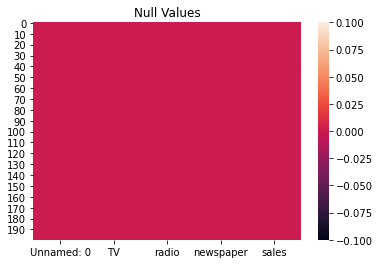

In [28]:
# we can check null values thriugh graph also
sns.heatmap(data.isna())
plt.title('Null Values')
plt.show()

evan we can create graph to check null values as we can see the colr of zero number is pink in colorbar and whole graph is pink in color that means there is no null values present in the dataset

In [29]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

there are total 4 columns availabel in the dataset

In [30]:
pd.set_option('display.max_rows',None)
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


display.max_option gives us all the rows present in the dataset wether its thousand in numbers or more than that

# visualization

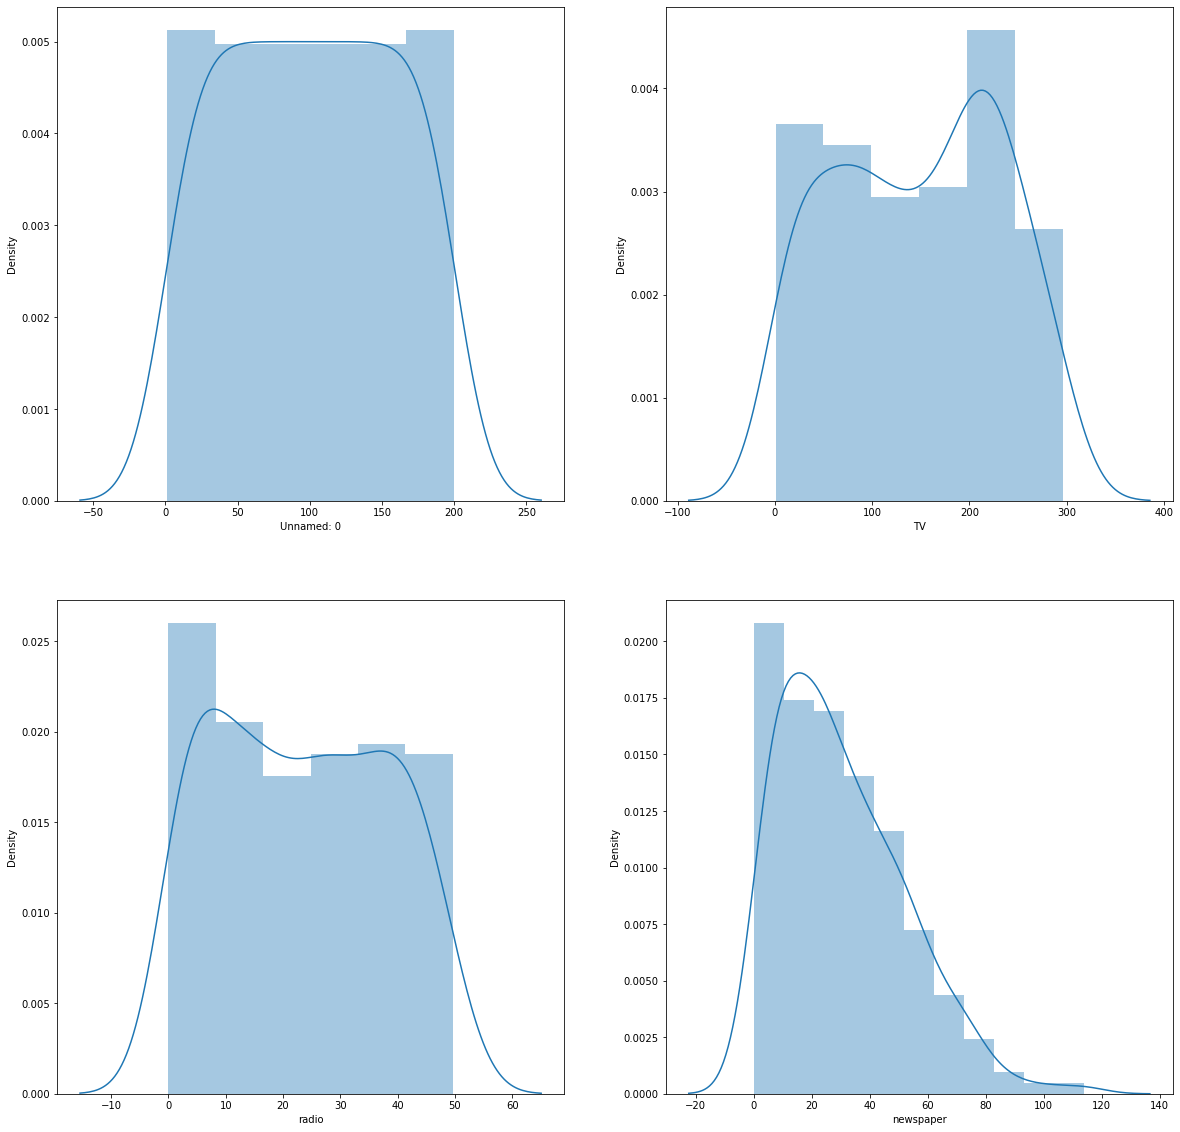

In [32]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

the distribution is not normally distributed in columns 

In [35]:
data.plot(kind='density',subplots=True,layout=(2,2))
plt.show()

ValueError: Layout of 2x2 must be larger than required size 5

<Figure size 432x288 with 0 Axes>

again we check the normal distribution among columns but as we see the data is not normally distributed so futher we will check for skewness or outliers and try to remove that so our data looks like normally distributed data

In [36]:
data.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

data is skewed in dataset that is the reason data is nonunoformaly distributed
1. tv is skwed to thr left side because of negative skewness

else all are skewed right side because all are positive in numbers

# dividing feature and target variables

In [37]:
x=data.drop(columns=['sales'])
x

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
5,6,8.7,48.9,75.0
6,7,57.5,32.8,23.5
7,8,120.2,19.6,11.6
8,9,8.6,2.1,1.0
9,10,199.8,2.6,21.2


we store feature variables in x 

those variables who are independent variables thriugh which we can predict our target variables

In [38]:
y=data['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
5       7.2
6      11.8
7      13.2
8       4.8
9      10.6
10      8.6
11     17.4
12      9.2
13      9.7
14     19.0
15     22.4
16     12.5
17     24.4
18     11.3
19     14.6
20     18.0
21     12.5
22      5.6
23     15.5
24      9.7
25     12.0
26     15.0
27     15.9
28     18.9
29     10.5
30     21.4
31     11.9
32      9.6
33     17.4
34      9.5
35     12.8
36     25.4
37     14.7
38     10.1
39     21.5
40     16.6
41     17.1
42     20.7
43     12.9
44      8.5
45     14.9
46     10.6
47     23.2
48     14.8
49      9.7
50     11.4
51     10.7
52     22.6
53     21.2
54     20.2
55     23.7
56      5.5
57     13.2
58     23.8
59     18.4
60      8.1
61     24.2
62     15.7
63     14.0
64     18.0
65      9.3
66      9.5
67     13.4
68     18.9
69     22.3
70     18.3
71     12.4
72      8.8
73     11.0
74     17.0
75      8.7
76      6.9
77     14.2
78      5.3
79     11.0
80     11.8
81     12.3
82     11.3
83  

# checking skewness of x and y 

In [39]:
x.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
dtype: float64

there is not much skewness in the dataset except in newspaper columns but we can remove it from power transform function

In [40]:
from sklearn.preprocessing import power_transform

In [41]:
new_x=power_transform(x)#instantiate the function 

x=pd.DataFrame(new_x,columns=x.columns)


used the power transform method to reduce the skewness in x 

In [42]:
x.skew().sort_values(ascending=False)

newspaper    -0.077942
radio        -0.242968
Unnamed: 0   -0.268270
TV           -0.315199
dtype: float64

validating the skewness has been reduce or not

In [43]:
x.skew()[np.abs(x.skew())<0.25].all()

True

skewness has been removed now we can proceed to further steps

again check the distribution to check the normal distribution

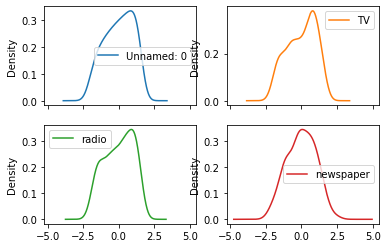

In [44]:
x.plot(kind='density',subplots=True,layout=(2,2))
plt.show()

now we can the data is normally distributed among feature variables

# checking outliers

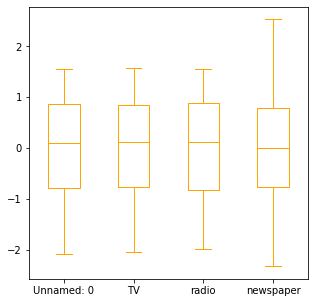

In [45]:
x.plot(kind='box',figsize=(5,5),color='orange')
plt.show()

there is no outliers present in the feature variables so we can further proceed

# checking the relationship between feature and target variable

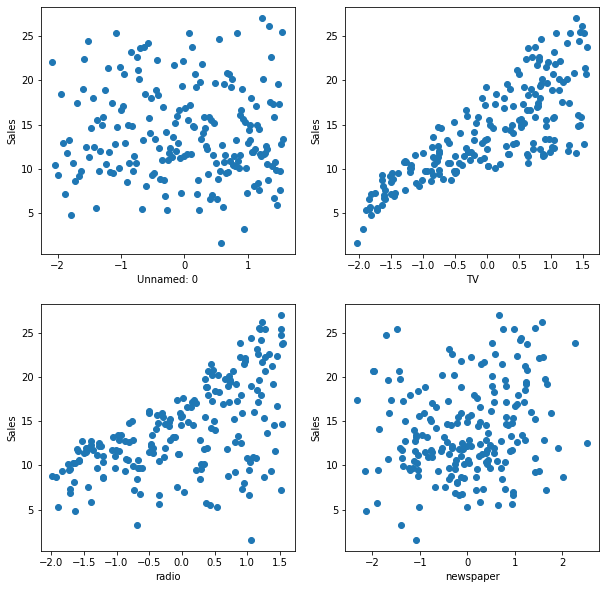

In [46]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in x:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('Sales')
    plotnumber+=1
plt.show()

as we see in thr graph when the tv channels and radio advertisement is increases then the sales is also increases ut in case of newpaper sales is not increasing

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x

array([[-2.07937596,  0.94867429,  0.96224689,  1.51433531],
       [-2.03292263, -1.19131426,  1.0401788 ,  0.78768252],
       [-1.990711  , -1.6477566 ,  1.37070964,  1.51699753],
       [-1.95139683,  0.14102023,  1.14238689,  1.21465643],
       [-1.91424742,  0.45271493, -0.74865064,  1.21170398],
       [-1.87880665, -1.82382233,  1.51501853,  1.66502354],
       [-1.8447658 , -1.00249116,  0.69372704, -0.1077535 ],
       [-1.81190337, -0.210275  , -0.10158544, -0.84409341],
       [-1.7800535 , -1.82609501, -1.63345378, -2.13259669],
       [-1.74908785,  0.64764492, -1.56676988, -0.22900395],
       [-1.71890445, -0.88377378, -1.20298758, -0.07226156],
       [-1.68942058,  0.79708355,  0.18072579, -1.60261898],
       [-1.66056789, -1.52641627,  0.81900563,  1.42512925],
       [-1.63228912, -0.48036844, -1.02813642, -1.22982506],
       [-1.60453563,  0.69106577,  0.6992403 ,  0.81860579],
       [-1.57726567,  0.60295713,  1.45770359,  1.04432344],
       [-1.55044308, -0.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.25,random_state=123)


# 1st model linear regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr=LinearRegression() #instantiate the model
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred=lr.predict(x_test) #store the predict column in y_pred

In [54]:
lr.score(x_train,y_train) #checking the training score

0.904270278767332

In [55]:
lr.score(x_test,y_test) #checking the testing score

0.9154766594889839

In [56]:
from sklearn import metrics

In [57]:
r2_score=metrics.r2_score(y_test,y_pred)
print("R-Square score associated with Linear Regression",r2_score)

R-Square score associated with Linear Regression 0.9154766594889839


the accuracy of linear regression is 91%

# compare actual and predicted data

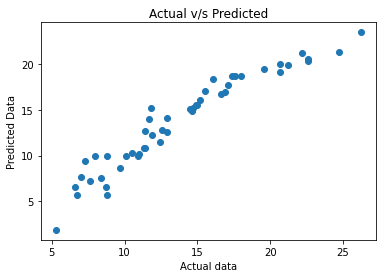

In [58]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual data')
plt.ylabel('Predicted Data')
plt.title('Actual v/s Predicted')
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Model Evaluation

In [60]:
m1=mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :", m1)

Mean Absolute Error is : 1.1541823299192773


In [61]:
m2=mean_squared_error(y_pred,y_test)
print("Mean Squared Error", m2)

Mean Squared Error 2.201984824231526


In [62]:
m3=np.sqrt(mean_squared_error(y_pred,y_test))
print("Root mean squared error: ", m3)

Root mean squared error:  1.4839086306884013


# conclusions

In [63]:
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
con=pd.DataFrame({'Original': a,'Predicted': predicted}, index=range(len(a)))
con

,Original,Predicted
0,11.4,12.630107
1,8.8,5.671151
2,14.7,15.216874
3,10.1,9.917215
4,14.6,14.877058
5,20.7,20.025154
6,12.6,12.844807
7,21.2,19.832785
8,14.9,15.529171
9,7.3,9.443083


we shown through graphs plus with the data also what we predicted and the original data

# Regularization
to check wheather  model is underfit or overfit

In [64]:
from sklearn.linear_model import Lasso,LassoCV

In [65]:
LassoCV=LassoCV(alphas=None, max_iter=100,normalize=True)
LassoCV.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [66]:
#best alpha parameters
alpha=LassoCV.alpha_
alpha

0.006736953595289313

In [67]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.9157140266395014

even after regularization the accuracy is same 

means model is neither over nor under fitted

in both the cases accuracy is 91% for testing data

# 2nd model( knn)

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

dont need to use feature selection here because there are only three columns here

we use feature selection when there huge number of columns and we need to select some to them to get the higher accuracy for our model

In [83]:
y_pred_knn=knn.predict(x_test)
y_pred


array([12.63010737,  5.67115068, 15.21687437,  9.91721499, 14.87705765,
       20.02515411, 12.84480738, 19.83278459, 15.52917131,  9.44308272,
       10.83154663, 20.296883  ,  6.56337513,  5.64897371,  1.88594224,
       12.25868812, 14.05118475, 15.17719878,  7.68567739, 18.65433358,
        7.23533495, 12.55732917,  9.90283735,  7.56850771, 21.27535115,
        9.93894547, 10.33461172, 15.48753506, 10.8481744 , 20.52720207,
       10.19316082, 21.24578226, 23.4596054 ,  6.53911982, 16.03241391,
       19.45564075, 18.71385885, 19.12616934, 16.90490014,  9.93835085,
        8.61138932, 18.40182352, 14.93854978, 18.72610876, 17.04092073,
       15.13616382, 17.7428978 , 13.9456295 , 16.74771028, 11.4306071 ])

In [84]:
#accuracy for training data
knn.score(x_train,y_train)

0.9233443934322422

In [85]:
#accuracy for testing data
knn.score(x_test,y_test)

0.8694397883355144

In [86]:
#check for cross validation
from sklearn.model_selection import cross_val_score

In [87]:
cross_val_score(knn,scaled_x,y,cv=5)


array([0.87459007, 0.9208542 , 0.91814537, 0.81964544, 0.87831437])

In [88]:
cross_val_score(KNeighborsRegressor(),scaled_x,y, cv=5).mean()

0.8823098912129226

cross validation score is to check weather the model is over or under fitted

but the accuracy is same so the model is neither over noe under fitted

# hyperparameter tuning for knn model

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
grid_params={'n_neighbors':[1,2,3],
            'metric':['euclidean','manhattan']}
print(grid_params)

{'n_neighbors': [1, 2, 3], 'metric': ['euclidean', 'manhattan']}


In [91]:
gs=GridSearchCV(KNeighborsRegressor(),grid_params,cv=5,n_jobs=-1)

In [92]:
gs_knn=gs.fit(x_train,y_train)

In [93]:
gs_knn.best_score_

0.8680450913547691

In [94]:
gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [95]:
knn=KNeighborsRegressor(n_neighbors=3,metric='manhattan')
knn.fit(x_train,y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=3)

In [96]:
y_pred_knn_hyper=knn.predict(x_test)
y_pred_knn_hyper

array([12.06666667,  9.46666667, 13.56666667, 10.76666667, 12.56666667,
       20.16666667, 11.86666667, 23.43333333, 14.3       , 10.23333333,
       11.16666667, 18.83333333,  7.96666667,  6.9       ,  7.63333333,
       10.26666667, 17.43333333, 11.96666667,  9.63333333, 21.6       ,
        7.9       , 14.83333333, 10.        ,  9.26666667, 19.13333333,
        9.7       , 10.56666667, 13.8       , 11.        , 22.33333333,
       11.46666667, 20.96666667, 24.43333333,  9.13333333, 15.86666667,
       19.73333333, 17.3       , 18.3       , 17.36666667, 10.56666667,
       10.13333333, 13.96666667, 14.3       , 21.16666667, 16.83333333,
       14.8       , 18.23333333, 12.8       , 16.26666667, 10.43333333])

In [97]:
knn.score(x_train,y_train)

0.9441970978212298

In [98]:
r2_score1=metrics.r2_score(y_test,y_pred_knn_hyper)
print("R-Square score associated with KNeighbors Regression",r2_score1)

R-Square score associated with KNeighbors Regression 0.8677830546159317


accuracy after hyperparameter tuning is same and even after cross validation is same

In [99]:
cross_val_knn=cross_val_score(KNeighborsRegressor(),scaled_x,y,cv=5).mean()
print(cross_val_knn)

0.8823098912129226


# compare actual and predicted data

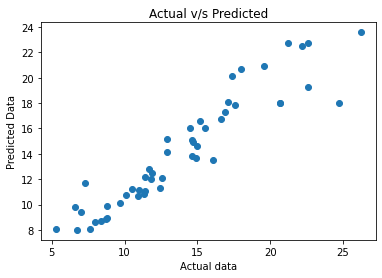

In [100]:
plt.scatter(y_test,y_pred_knn)
plt.xlabel('Actual data')
plt.ylabel('Predicted Data')
plt.title('Actual v/s Predicted')
plt.show()

because the model gives the 94% accuracy that is reason th graph seems pretty equal 

# conclusions

In [101]:
a1=np.array(y_test)
predicted=np.array(knn.predict(x_test))
con=pd.DataFrame({'Original': a1,'Predicted': predicted}, index=range(len(a1)))
con

,Original,Predicted
0,11.4,12.066667
1,8.8,9.466667
2,14.7,13.566667
3,10.1,10.766667
4,14.6,12.566667
5,20.7,20.166667
6,12.6,11.866667
7,21.2,23.433333
8,14.9,14.300000
9,7.3,10.233333


knn model gives 94% of accuracy 

# 3rd model Decision tree regressor

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [104]:
dt.score(x_train,y_train)

1.0

In [105]:
dt_pred=dt.predict(x_test)

In [106]:
r2_score1=metrics.r2_score(y_test,dt_pred)
print("R-Square score associated with Decision Tree Regression",r2_score1)

R-Square score associated with Decision Tree Regression 0.9407641607511437


# hyperparameter for Decision tree regressor

In [107]:
grid_params1={'max_depth': [2, 3, 5, 10, 20],
              'min_samples_leaf': [5, 10, 20, 50, 100]
             }
print(grid_params1)

{'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100]}


In [108]:
gs1=GridSearchCV(DecisionTreeRegressor(),param_grid=grid_params1,cv=5,n_jobs=-1)

In [109]:
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [110]:
gs1.best_score_

0.8975709322704596

In [111]:
gs1.best_params_

{'max_depth': 10, 'min_samples_leaf': 5}

In [112]:
dt=DecisionTreeRegressor(max_depth=10,min_samples_leaf=5)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)

In [113]:
y_pred_dt_hyper=knn.predict(x_test)
y_pred_dt_hyper

array([12.06666667,  9.46666667, 13.56666667, 10.76666667, 12.56666667,
       20.16666667, 11.86666667, 23.43333333, 14.3       , 10.23333333,
       11.16666667, 18.83333333,  7.96666667,  6.9       ,  7.63333333,
       10.26666667, 17.43333333, 11.96666667,  9.63333333, 21.6       ,
        7.9       , 14.83333333, 10.        ,  9.26666667, 19.13333333,
        9.7       , 10.56666667, 13.8       , 11.        , 22.33333333,
       11.46666667, 20.96666667, 24.43333333,  9.13333333, 15.86666667,
       19.73333333, 17.3       , 18.3       , 17.36666667, 10.56666667,
       10.13333333, 13.96666667, 14.3       , 21.16666667, 16.83333333,
       14.8       , 18.23333333, 12.8       , 16.26666667, 10.43333333])

In [114]:
dt.score(x_train,y_train)

0.9806729667534472

In [115]:
r2_score2=metrics.r2_score(y_test,y_pred_dt_hyper)
print("R-Square score associated with Decision Tree Regression",r2_score2)

R-Square score associated with Decision Tree Regression 0.8677830546159317


In [116]:
#check for Creoss validation score
cross_val_score2=cross_val_score(DecisionTreeRegressor(),scaled_x,y,cv=5).mean()
print("Cross validation score of decision tree regressor is: ",cross_val_score2)

Cross validation score of decision tree regressor is:  0.9513628434861869


in decision tree cross val score increased by 6 % that model is under fitted

# compare actual and predicted data

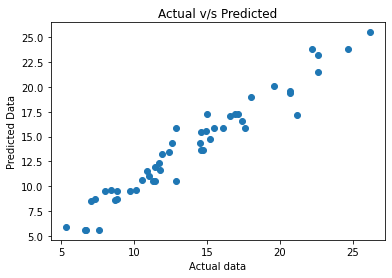

In [117]:
plt.scatter(y_test,dt_pred)
plt.xlabel('Actual data')
plt.ylabel('Predicted Data')
plt.title('Actual v/s Predicted')
plt.show()

# conclusions

In [118]:
a2=np.array(y_test)
predicted=np.array(dt.predict(x_test))
con=pd.DataFrame({'Original': a1,'Predicted': predicted}, index=range(len(a2)))
con

,Original,Predicted
0,11.4,11.900000
1,8.8,8.616667
2,14.7,13.328571
3,10.1,9.720000
4,14.6,16.416667
5,20.7,19.211111
6,12.6,14.860000
7,21.2,18.620000
8,14.9,14.860000
9,7.3,8.733333


this is the graph and data representation for original and predicted data 

1.Linear Regression=91%

2.KNeighbors Regression=88%

3.DecisionTreeRegression =95%

In [119]:
import pickle

In [120]:
filename='advertisement.pkl'


In [121]:
pickle.dump=(dt,open('advertisement.pkl','wb'))

we are saving the data with decision tree regression instantiate because this model gives the best result compared to other one